In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.metrics import recall_score,precision_score,f1_score,accuracy_score,classification_report

In [2]:
df=pd.read_csv("WELFake_Dataset.csv")
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [4]:
df['Word Count'] = df['text'].apply(lambda x: len(str(x).split(' '))) 

In [5]:
df[['text','Word Count']].head(5)

,text,Word Count
0,No comment is expected from Barack Obama Membe...,941
1,Did they post their votes for Hillary already?,8
2,"Now, most of the demonstrators gathered last ...",38
3,A dozen politically active pastors came here f...,1290
4,"The RS-28 Sarmat missile, dubbed Satan 2, will...",329


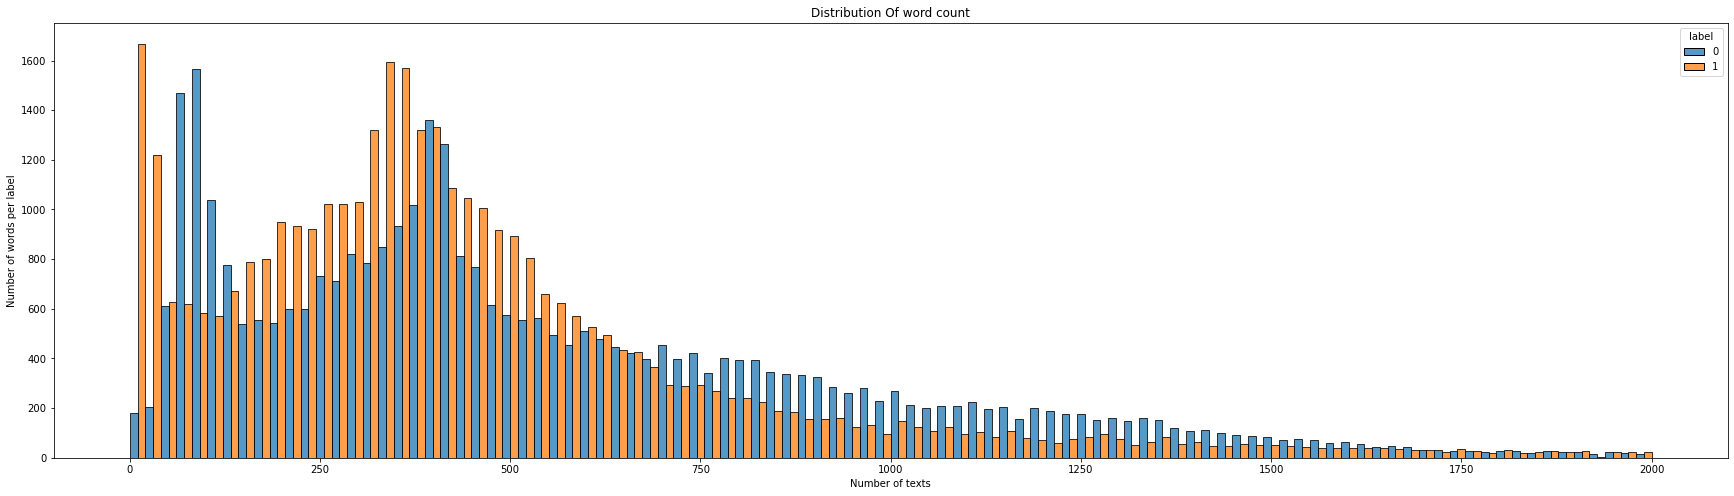

In [6]:
plt.figure(figsize=(30,8))
sns.histplot(x='Word Count',data=df,hue='label',binrange=[0,2000],multiple='dodge')
plt.ylabel('Number of words per label')
plt.title('Distribution Of word count')
plt.xlabel('Number of texts');

# Number of stopwords

In [7]:
from nltk.corpus import stopwords

In [8]:
stop = stopwords.words('english')

In [9]:
df['Stop Words Count'] = df['text'].apply(lambda x:len([x for x in str(x).split() if x in stop]))

In [10]:
df.head(5)

,Unnamed: 0,title,text,label,Word Count,Stop Words Count
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,941,348
1,1,NaN,Did they post their votes for Hillary already?,1,8,3
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,38,12
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,1290,524
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,329,109


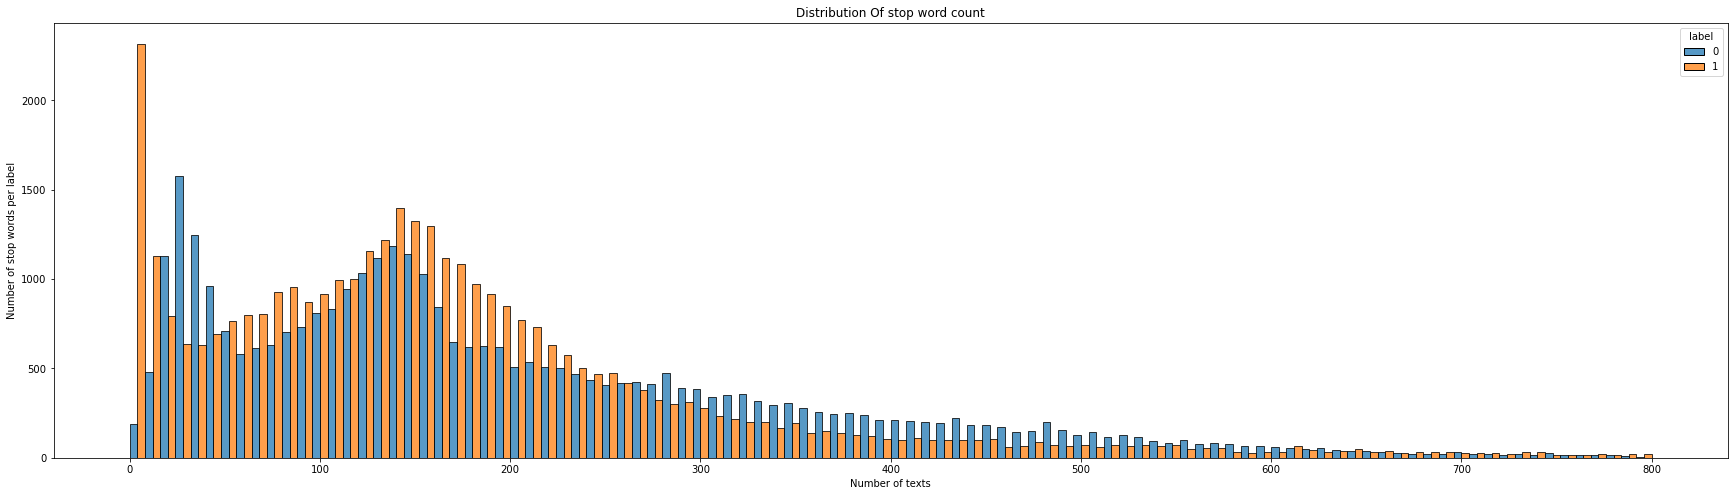

In [11]:
plt.figure(figsize=(30,8))
sns.histplot(x=df['Stop Words Count'],data=df,hue='label',binrange=[0,800],multiple='dodge')
plt.ylabel('Number of stop words per label')
plt.title('Distribution Of stop word count')
plt.xlabel('Number of texts');

# Preparing the Data

In [12]:
df['text'] = df['text'].apply(lambda x:str(x).lower())

In [13]:
df.text.head(5)

0    no comment is expected from barack obama membe...
1       did they post their votes for hillary already?
2     now, most of the demonstrators gathered last ...
3    a dozen politically active pastors came here f...
4    the rs-28 sarmat missile, dubbed satan 2, will...
Name: text, dtype: object

# Removing the punctuation

In [14]:
df['text'] = df['text'].str.replace('[^\w\s]' ,' ')

<ipython-input-14-42e5f39fdf3f>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('[^\w\s]' ,' ')


In [15]:
df.text.head()

0    no comment is expected from barack obama membe...
1       did they post their votes for hillary already 
2     now  most of the demonstrators gathered last ...
3    a dozen politically active pastors came here f...
4    the rs 28 sarmat missile  dubbed satan 2  will...
Name: text, dtype: object

# Removing the stopwords

In [16]:
df['text'] = df.text.apply(lambda x:' '.join(x for x in str(x).split() if x not in stop))

In [17]:
df.text.head(5)

0    comment expected barack obama members fyf911 f...
1                           post votes hillary already
2    demonstrators gathered last night exercising c...
3    dozen politically active pastors came private ...
4    rs 28 sarmat missile dubbed satan 2 replace ss...
Name: text, dtype: object

# Removing top 10 common words

In [18]:
freq  = pd.Series(' '.join(df['text']).split()).value_counts()[:10]

In [19]:
freq

said         234319
trump        213565
would        105615
people        90445
president     90282
one           88700
clinton       73980
mr            72389
u             72269
new           70862
dtype: int64

In [20]:
df['text'] = df.text.apply(lambda x:' '.join(x for x in str(x).split() if x not in freq))

In [21]:
df.text.head(5)

0    comment expected barack obama members fyf911 f...
1                           post votes hillary already
2    demonstrators gathered last night exercising c...
3    dozen politically active pastors came private ...
4    rs 28 sarmat missile dubbed satan 2 replace ss...
Name: text, dtype: object

# Removing Rarely occuring words

In [22]:
freq  = pd.Series(' '.join(df['text']).split()).value_counts()[-20:]

In [23]:
freq

2016adele     1
prihodko      1
sotschi       1
trickeries    1
euston        1
picaridin     1
duramadera    1
инцидента     1
bendell       1
lutes         1
kuaşi         1
allport       1
misoff        1
tamps         1
fci           1
scottjos      1
coneixença    1
arriesgar     1
haiquan       1
jamoul        1
dtype: int64

In [24]:
rare_freq = freq[-25:]

In [25]:
df['text'] = df.text.apply(lambda x:' '.join(x for x in str(x).split() if x not in rare_freq))

In [26]:
df.head(5)

,Unnamed: 0,title,text,label,Word Count,Stop Words Count
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,comment expected barack obama members fyf911 f...,1,941,348
1,1,NaN,post votes hillary already,1,8,3
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,demonstrators gathered last night exercising c...,1,38,12
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",dozen politically active pastors came private ...,0,1290,524
4,4,SATAN 2: Russia unvelis an image of its terrif...,rs 28 sarmat missile dubbed satan 2 replace ss...,1,329,109


# Let's now compare the data after preprocessing

In [27]:
df['Word Count'] = df['text'].apply(lambda x: len(str(x).split(' '))) 

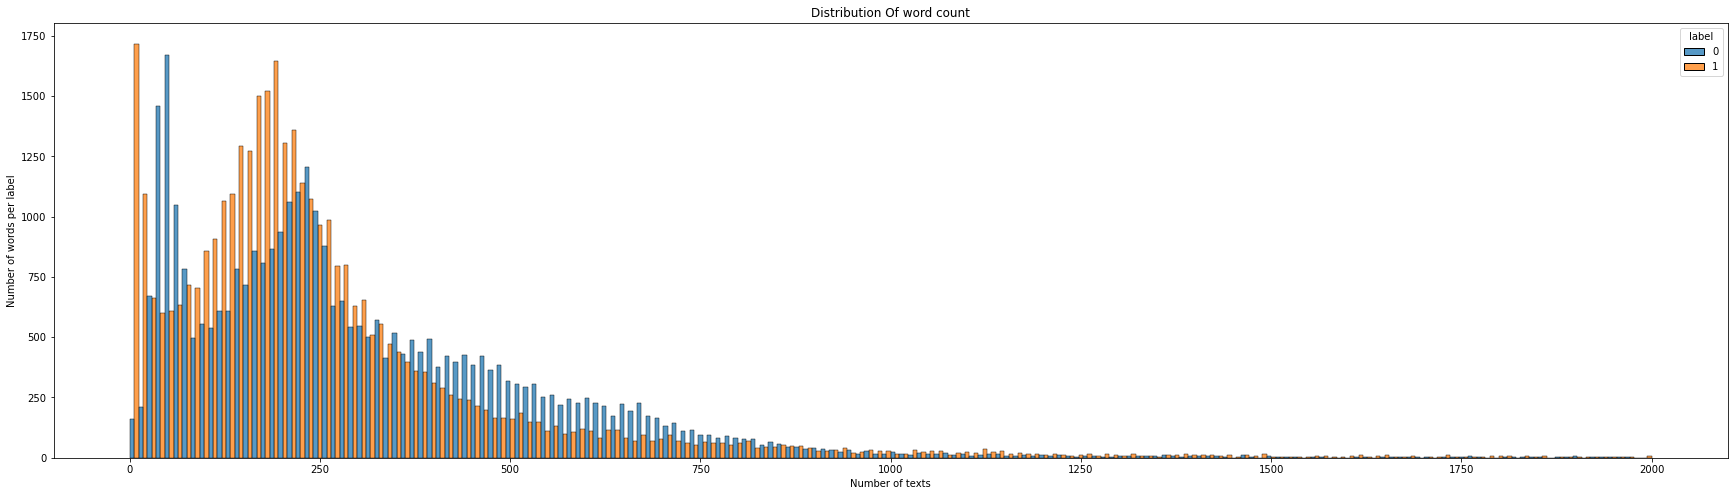

In [28]:
plt.figure(figsize=(30,8))
sns.histplot(x='Word Count',data=df,hue='label',binrange=[0,2000],multiple='dodge')
plt.ylabel('Number of words per label')
plt.title('Distribution Of word count')
plt.xlabel('Number of texts');

In [29]:
df['Stop Words Count'] = df['text'].apply(lambda x:len([x for x in str(x).split() if x in stop]))

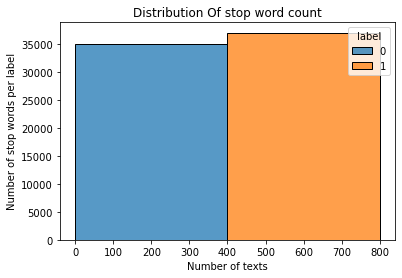

In [30]:
sns.histplot(x=df['Stop Words Count'],data=df,hue='label',binrange=[0,800],multiple='dodge')
plt.ylabel('Number of stop words per label')
plt.title('Distribution Of stop word count')
plt.xlabel('Number of texts');

# After Preprocessing

In [31]:
# !pip install wordcloud

In [32]:
df['text'][:500]

0      comment expected barack obama members fyf911 f...
1                             post votes hillary already
2      demonstrators gathered last night exercising c...
3      dozen politically active pastors came private ...
4      rs 28 sarmat missile dubbed satan 2 replace ss...
                             ...                        
495    washington reuters washington judge ordered re...
496    insane watch protests erupted chicago tuesday ...
497    reuters power outages hurricane irma dropped 6...
498    nordstrom yesterday salesperson asked teenage ...
499    moscow reuters russia wednesday warned iraq ku...
Name: text, Length: 500, dtype: object

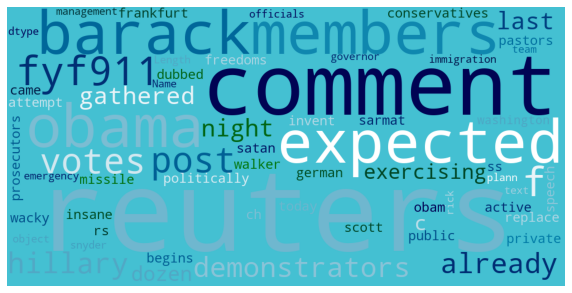

In [33]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
import matplotlib.pyplot as plt
def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud)
    plt.axis("off");
wordcloud = WordCloud(width = 1000, height = 500, stopwords=stop_words,
                      max_words=100,background_color='#44C0D2', 
                      colormap="ocean",  random_state=10).generate(str(df['text'][:20000]))
plot_cloud(wordcloud)

# Identifying Input and Target Columns

In [34]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        72134 non-null  int64 
 1   title             71576 non-null  object
 2   text              72134 non-null  object
 3   label             72134 non-null  int64 
 4   Word Count        72134 non-null  int64 
 5   Stop Words Count  72134 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 3.3+ MB


In [35]:
df.shape

(72134, 6)

In [36]:
input_cols = ['text']

In [37]:
target_col = 'label'

In [38]:
inputs = df[input_cols].copy()
targets = df[target_col].copy()

In [39]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\manga\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [40]:
#Building corpus out of text data takes a lot of time, I have build the corpus and stored in pickle file
#so simply read from the same 

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
import re

corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', str(df['text'][i]))

    review = str(df['text'][i]).replace('[^\w\s]' ,' ')

    review = review.lower()
    review = review.split()

    review = [stemmer.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

# Bag of Words

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

In [42]:
bow = CountVectorizer(max_features=6000,analyzer='word',ngram_range=(1,2))

In [43]:
X = bow.fit_transform(corpus).toarray()

In [44]:
y = df[['label']].iloc[:,-1]

# Devide The Data into Training and Testing data

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
len(list(bow.get_feature_names_out()))

6000

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

# Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
model = LogisticRegression(random_state=42,solver='newton-cg',n_jobs=-1)

In [50]:
model.fit(X_train, y_train)

LogisticRegression(n_jobs=-1, random_state=42, solver='newton-cg')

In [51]:
lreg_preds = model.predict(X_test)

In [52]:
accuracy_score(lreg_preds, y_test)

0.9470279353077085

In [53]:
print(classification_report(lreg_preds, y_test))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94     11331
           1       0.96      0.94      0.95     12474

    accuracy                           0.95     23805
   macro avg       0.95      0.95      0.95     23805
weighted avg       0.95      0.95      0.95     23805



In [54]:
performance_df = pd.DataFrame({
    'model': ['LogisticRegression'],
    'accuracy_score': [accuracy_score(lreg_preds, y_test)],
    'recall_score': [recall_score(lreg_preds, y_test)],
    'precision_score': [precision_score(lreg_preds, y_test)],
    'f1_score': [f1_score(lreg_preds, y_test)],
})

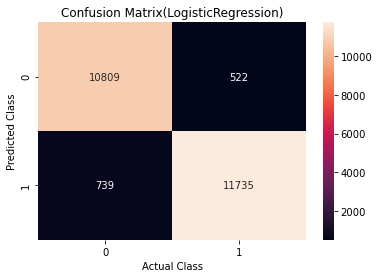

In [55]:
from sklearn.metrics import  confusion_matrix
sns.heatmap(confusion_matrix(lreg_preds,y_test),annot=True,fmt='d');
plt.xlabel('Actual Class')
plt.ylabel('Predicted Class')
plt.title('Confusion Matrix(LogisticRegression)');

# K-nearest Neighbourhood

In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

error_knn = []
for i in range(1, 30):
 knn = KNeighborsClassifier(n_neighbors = i)
 knn.fit(X_train, y_train)
 pred_i = knn.predict(X_test)
 error_knn.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10, 5))
plt.plot(range(1, 30), error_knn, color = 'blue', linestyle = 'dashed', marker = 'o')
plt.title('Error vs. K Value')
plt.xlabel('K')
plt.ylabel('Error')

In [ ]:
k = error_knn.index(min(error_knn)) + 1
k

In [ ]:
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
knn_score = accuracy_score(y_test, knn_pred)

In [ ]:
knn_accuracy=np.round((knn_score)*100,2)
knn_accuracy

In [ ]:
performance = {
    'model': ['KNeighborsClassifier'],
    'accuracy_score': [accuracy_score(knn_preds, y_test)],
    'recall_score': [recall_score(knn_preds, y_test)],
    'precision_score': [precision_score(test_preds, y_test)],
    'f1_score': [f1_score(knn_preds, y_test)],
}

In [ ]:
print(classification_report(knn_preds, y_test))

In [ ]:
sns.heatmap(confusion_matrix(knn_preds,y_test),annot=True,fmt='d');
plt.xlabel('Actual Class')
plt.ylabel('Predicted Class')
plt.title('Confusion Matrix(KNeighborsClassifier)');

# Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(random_state=42,n_jobs=-1)

In [ ]:
model.fit(X_train,y_train)

In [ ]:
rf_preds = model.predict(X_test)

In [ ]:
rf_score = accuracy_score(y_test, rf_pred)

In [ ]:
rf_accuracy=np.round((knn_score)*100,2)
rf_accuracy

In [ ]:
performance = {
    'model': ['RandomForestClassifier'],
    'accuracy_score': [accuracy_score(rf_preds, y_test)],
    'recall_score': [recall_score(rf_preds, y_test)],
    'precision_score': [precision_score(rf_preds, y_test)],
    'f1_score': [f1_score(rf_preds, y_test)],
}

# Result

In [ ]:
models = pd.DataFrame({
     'Model': [ 'K-Nearest Neighbors', 'Random Forest',"Logistic regression"],
    'Score': [ knn_accuracy, rf_accuracy,lreg_accuracy]})
models.sort_values(by='Score', ascending=False)